In [1]:
import numpy as np
import PIL
from PIL import Image
import torch
from torch.utils.data import Dataset
from IPython.core.display import display, HTML
import torchvision.transforms as transforms
import torchvision

In [2]:
torch.__version__

'1.0.1.post2'

## Before we get into things, here are some handy functions to plot the dataset and image.

In [3]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


plt.rcParams['axes.grid'] = False
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['figure.figsize'] = 40, 50
plt.rcParams['figure.dpi'] = 200
    
def show_dataset(dataset, n=4):
    """
    creates a grid of images
    """
    imgs_stack = []
    for i in range(len(dataset)):
        imgs = torch.cat([dataset[i][0] for _ in range(n)], 1)
        imgs_stack.append(imgs)
    grid_imgs = torchvision.utils.make_grid(torch.stack(imgs_stack), nrow=len(dataset))
    plt.imshow(transforms.ToPILImage()(grid_imgs))
#     plt.axis("off")

def show_img(img):
    """
    plots a single image
    """
    plt.imshow(transforms.ToPILImage()(img), interpolation="bicubic")
#     plt.axis("off")

### Import car images

We'll import some car images from the Stanford cars dataset.  The text file train_small contains the path to car images.  

In [4]:
# import images from a txt file with image paths
image_file_path = "../data/cars/train_small.txt"
img_size=224


class CarsDataset(Dataset):
    """ Stanford cars dataset """
    def __init__(self, image_file_path, transform=None):
        """
        image_file_path: path to text file with list of image file paths
        transform (callable, optional) - Transform object to be applied to each image
        """
        self.image_file_path = image_file_path
        self.transform = transform
        
        
        with open(self.image_file_path, "r") as file:
            self.img_files = file.readlines()

    def __getitem__(self, index):
        """
        get an image
        """
        
        img_path = self.img_files[index % len(self.img_files)].rstrip()
        # convert to RGB file
        img = Image.open(self.img_files[index].rstrip()).convert("RGB")
        
        # perform transforms
        if self.transform:
            img = self.transform(img)
        
        # convert to tensor
        img = transforms.ToTensor()(img)
        
    
        return img, img_path
    
    
    def __len__(self):
        return len(self.img_files)

### Torchvision transforms

Check <a href='https://pytorch.org/docs/stable/torchvision/transforms.html' target='_blank'>torchvision.transforms</a> for a list and explanation of all possible transforms.

torchvision.transforms.Compose() allows for a list of transforms to be passed to the list of numpy images.  

In [5]:
# create a list of transforms
transform_funcs = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.RandomHorizontalFlip(p=0.5)
])

### Create the dataset

In [6]:
# create the dataset
cars_dataset = CarsDataset(image_file_path, transform=transform_funcs)

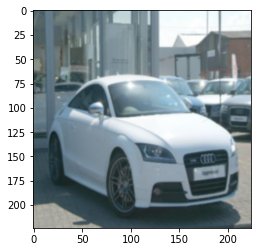

In [7]:
# plot single car image
show_img(cars_dataset[0][0])

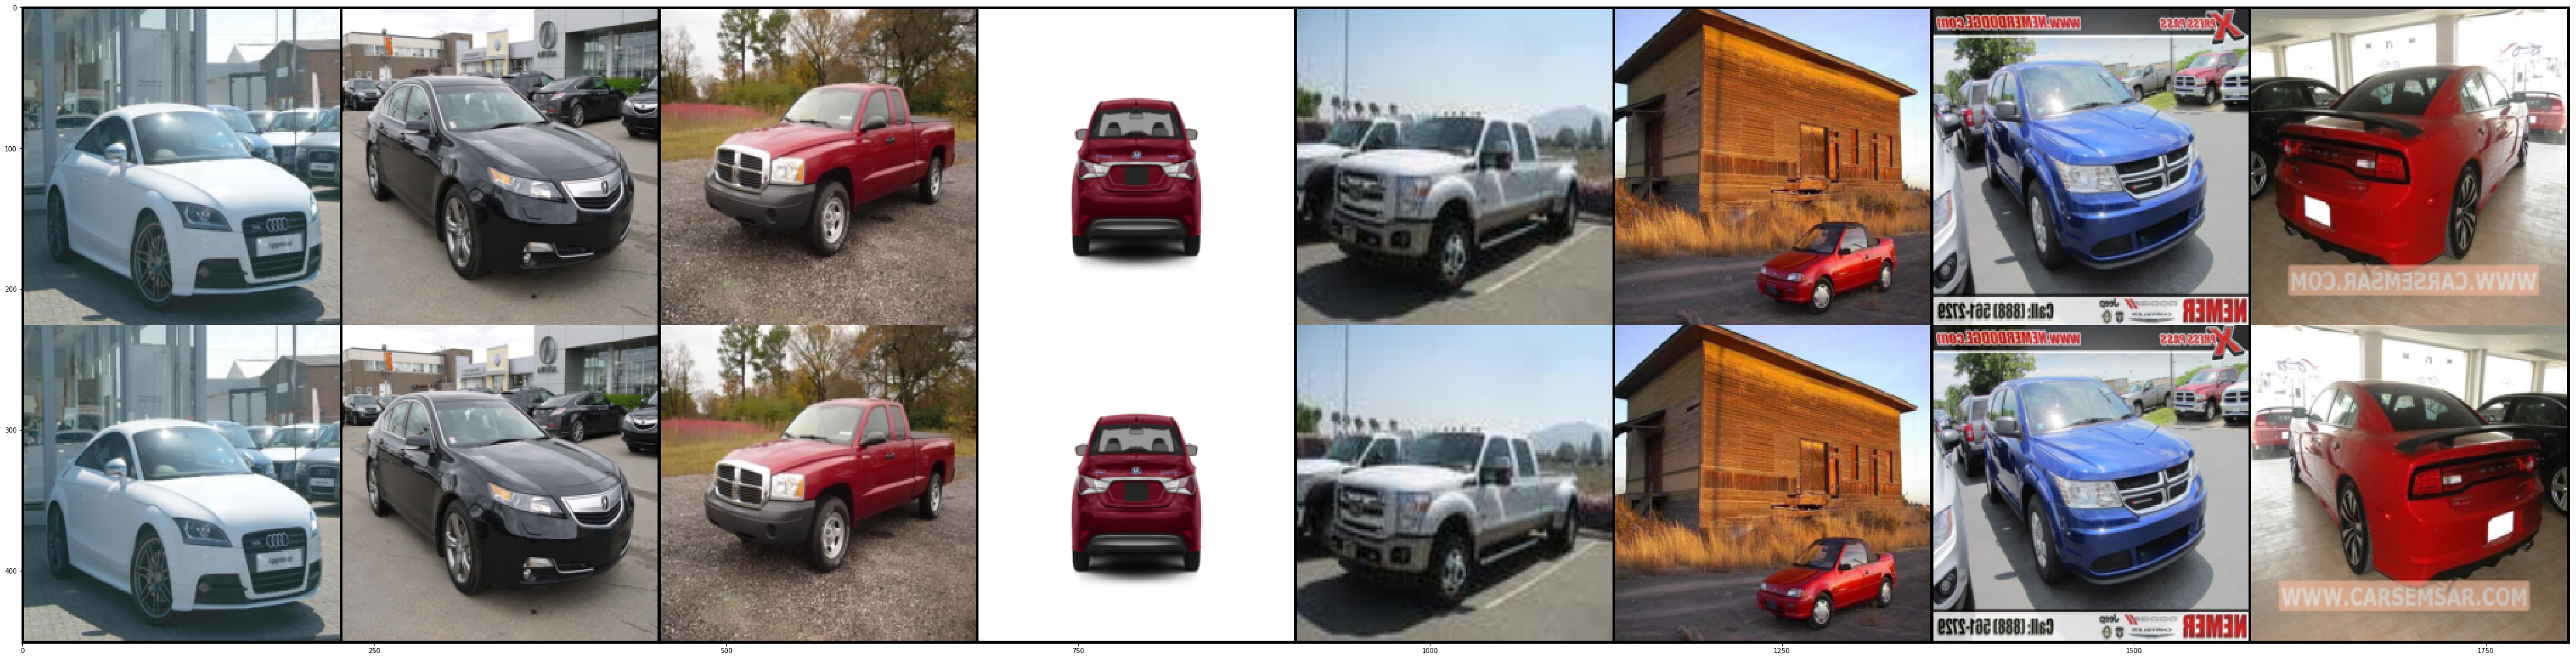

In [8]:
# plot dataset with 4 images per car
plt.rcParams['figure.figsize'] = 70, 70
show_dataset(cars_dataset, n=2)

Let's add more transforms and see how the dataset looks.

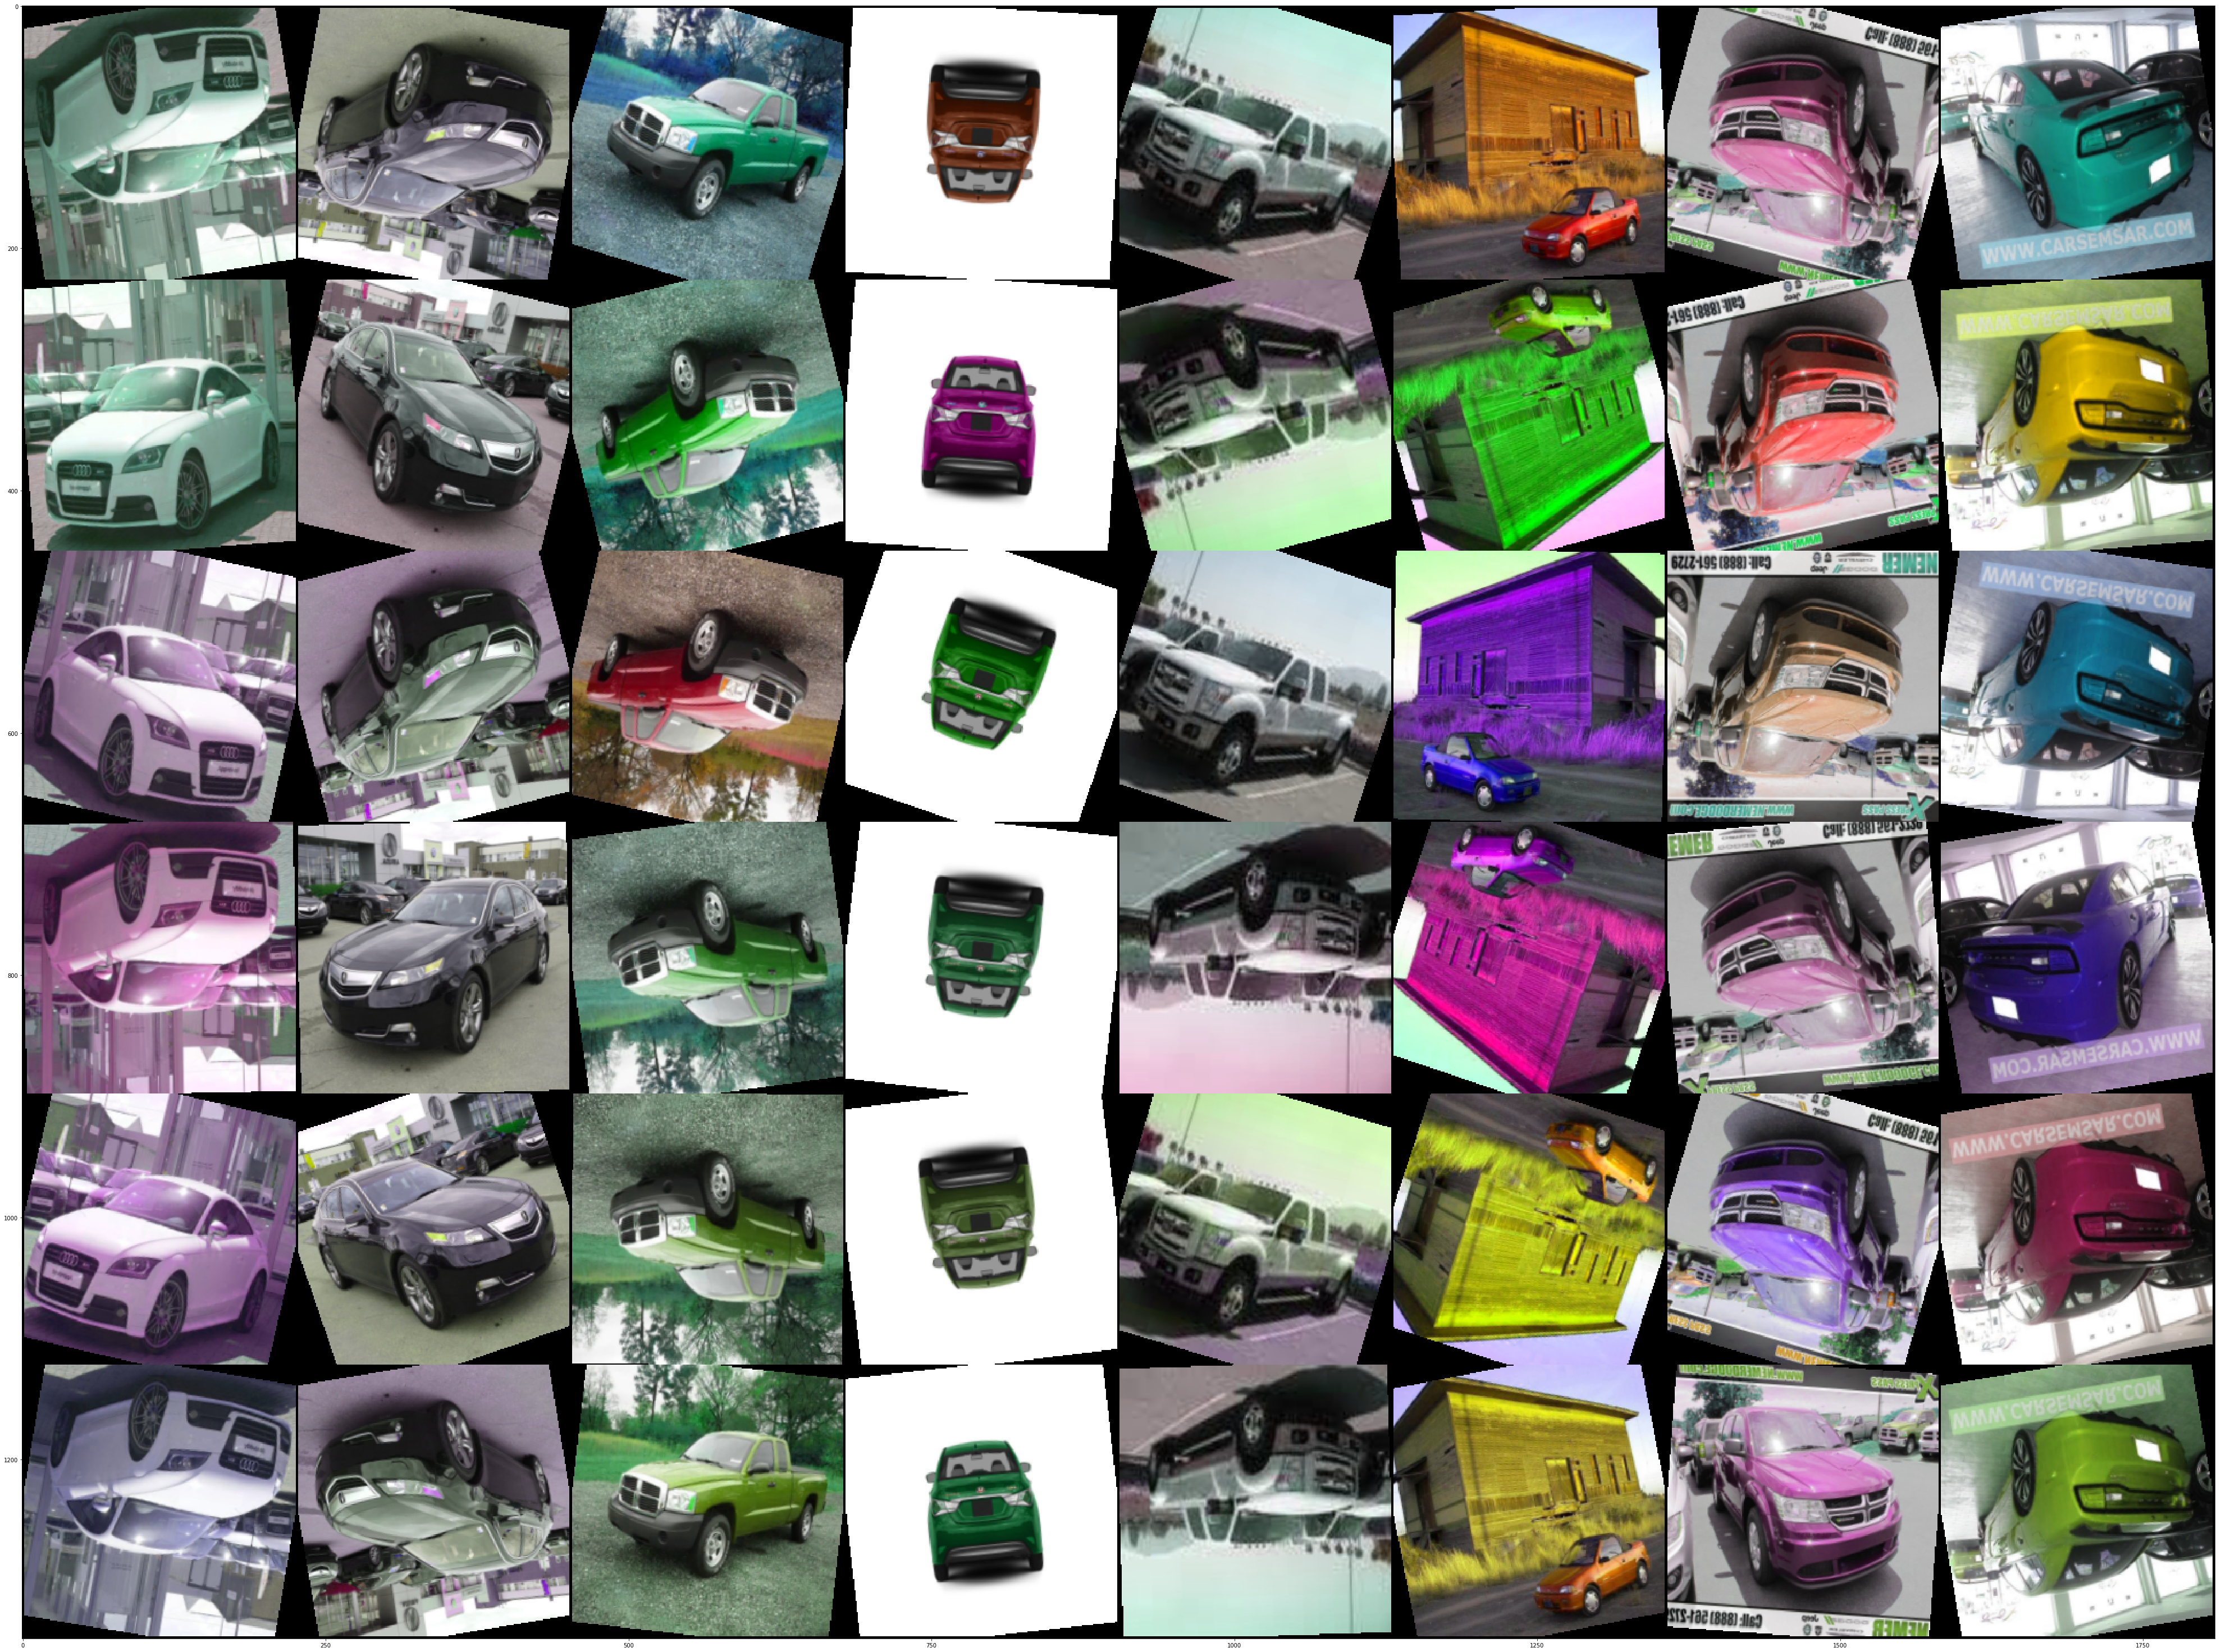

In [9]:
transform_funcs2 = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ColorJitter(hue=.5, saturation=.5),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
    transforms.RandomVerticalFlip(p=0.5)
#     transforms.RandomPerspective(distortion_scale=0.5, p=0.5, interpolation=3)
])


# create the dataset
cars_dataset = CarsDataset(image_file_path, transform=transform_funcs2)

show_dataset(cars_dataset, n=6)

In [ ]:
transform_funcs2 = transforms.Compose([
    transforms.Pad()
#     transforms.RandomPerspective(distortion_scale=0.5, p=0.5, interpolation=3)
])


# create the dataset
cars_dataset = CarsDataset(image_file_path, transform=transform_funcs2)

show_dataset(cars_dataset, n=6)